In [44]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolsToGridImage, MolsMatrixToGridImage
IPythonConsole.ipython_useSVG=True
IPythonConsole.molSize=(400, 400)
from rdkit.Chem import rdAbbreviations

In [45]:
df = pd.read_excel('db.xlsx', sheet_name='Box4')

In [46]:
df['Code'] = df['Code'].fillna('nd')

In [47]:
# just to test
abbrevs = rdAbbreviations.GetDefaultAbbreviations()
mol = Chem.MolFromSmiles(df.iloc[2,1])
nm = rdAbbreviations.CondenseMolAbbreviations(mol,abbrevs)

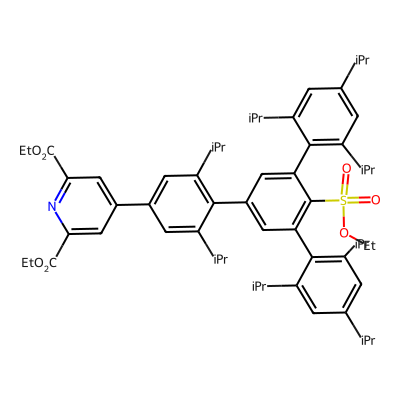

In [48]:
nm

In [49]:
smiles = list(df['SMILES'])
locations = list(df['Location'])
codes = list(df['Code'])
mols = [rdAbbreviations.CondenseMolAbbreviations(Chem.MolFromSmiles(smile),abbrevs) for smile in smiles]

In [50]:

MolsToGridImage(mols=mols, legends=[f'{locs}, {code}' for locs, code in zip(locations, codes)], molsPerRow=5, maxMols=40, useSVG=True, subImgSize=(1000,1000))
